<a href="https://colab.research.google.com/github/Abay32/Img_Classification/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as pt
pt.style.use('fivethirtyeight')

In [ ]:
# load the data 
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Get the shape of arrays 
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [ ]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

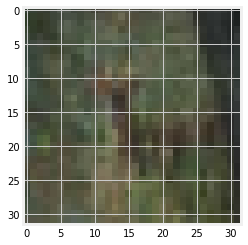

In [ ]:
# Show the image as a picture 
img = pt.imshow(x_train[index])

In [ ]:
# Get the img label 
print('The img label is:', y_train[index])

The img label is: [4]


In [ ]:
# Get the image classification 
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Print the image class 
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
# Convert the labels into a set of 10 numbers to input into the neural network 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Print the new lebles 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Print the new label of the image above 
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalize the pixels to be vlues between 0 and 1 (nornalization )
x_train = x_train/255 # the maximum byte values
x_test = x_test/255

In [ ]:
# Create models architecture 
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), activation='relu',  input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add the second convolution layer 
model.add( Conv2D(32, (5,5), activation='relu') )

#Add another pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flatter layer 
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10  neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
#Train the model 
hist = model.fit(x_train, y_train_one_hot, 
                 batch_size=256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 54s 335ms/step - loss: 1.7487 - accuracy: 0.3564 - val_loss: 1.4597 - val_accuracy: 0.4749
Epoch 2/10
157/157 [==============================] - 49s 312ms/step - loss: 1.4006 - accuracy: 0.4923 - val_loss: 1.4017 - val_accuracy: 0.4924
Epoch 3/10
157/157 [==============================] - 50s 319ms/step - loss: 1.2349 - accuracy: 0.5577 - val_loss: 1.1676 - val_accuracy: 0.5902
Epoch 4/10
157/157 [==============================] - 49s 310ms/step - loss: 1.1484 - accuracy: 0.5890 - val_loss: 1.1405 - val_accuracy: 0.5991
Epoch 5/10
157/157 [==============================] - 48s 306ms/step - loss: 1.0687 - accuracy: 0.6217 - val_loss: 1.1143 - val_accuracy: 0.6083
Epoch 6/10
157/157 [==============================] - 49s 310ms/step - loss: 0.9980 - accuracy: 0.6458 - val_loss: 1.0063 - val_accuracy: 0.6514
Epoch 7/10
157/157 [==============================] - 48s 307ms/step - loss: 0.9398 - accuracy: 0.6670 - val_loss: 0.9944 - val_ac

In [ ]:
# Evaluate the model using the dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 22ms/step - loss: 0.9541 - accuracy: 0.6778


0.6777999997138977

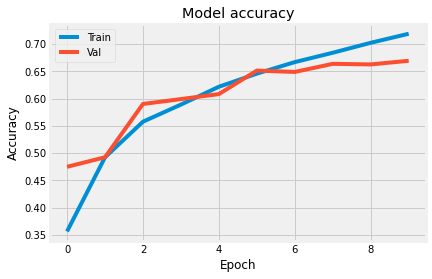

In [ ]:
# Visualize the models accuracy
hist.history
pt.plot(hist.history['accuracy'])
pt.plot(hist.history['val_accuracy'])
pt.title('Model accuracy')
pt.xlabel('Epoch')
pt.ylabel('Accuracy')
pt.legend(['Train', 'Val'], loc = 'upper left')
pt.show()

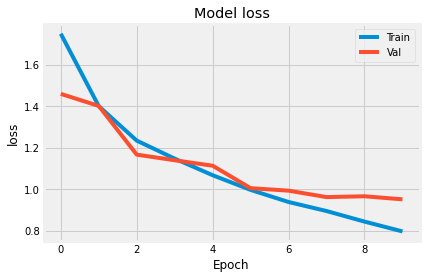

In [ ]:
# Visualize the models loss
hist.history
pt.plot(hist.history['loss'])
pt.plot(hist.history['val_loss'])
pt.title('Model loss')
pt.xlabel('Epoch')
pt.ylabel('loss')
pt.legend(['Train', 'Val'], loc = 'upper right')
pt.show()

In [ ]:
# Test the model with an example 
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


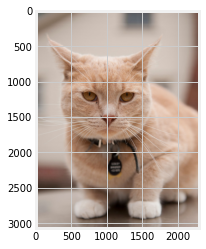

In [ ]:
# Show the image
new_img = pt.imread('cat.jpg')
img = pt.imshow(new_img)

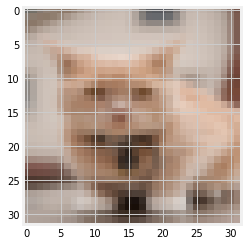

In [ ]:
# Resize the image to (32,32)
from  skimage.transform import resize
resized_img = resize(new_img, (32,32,3))
img = pt.imshow(resized_img)


In [ ]:
#Get the models prediction 
import numpy as np
predictions = model.predict(np.array([resized_img]))
predictions

array([[9.5095662e-03, 3.1919315e-04, 3.5235497e-01, 2.1527798e-01,
        9.7910322e-02, 1.4996040e-01, 1.6417624e-01, 6.8715317e-03,
        2.8401569e-03, 7.7958050e-04]], dtype=float32)

In [ ]:
# Sort the predictions from last to greatest 
list_ind = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_ind[i]] > x[0][list_ind[j]]:
      temp = list_ind[i]
      list_ind[i] = list_ind[j]
      list_ind[j] = temp
# Show the sorted values in order 
print(list_ind)
        

[2, 3, 6, 5, 4, 0, 7, 8, 9, 1]


In [ ]:
# print the first 5 most predictions 
for i in range(5):
  print(classification[list_ind[i]], ':', round(predictions[0][list_ind[i]]*100, 2), '%')

bird : 35.24 %
cat : 21.53 %
frog : 16.42 %
dog : 15.0 %
deer : 9.79 %
